# Jaccard and word2vec matrices

## Dependencies

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as sp

import matrices.loading as mload

In [2]:
plt.rcParams["figure.figsize"] = (16,16)
mpl.rcParams['image.cmap'] = 'jet'

## Dataset (629814 documents)

This is the path to th dataset.

In [3]:
data_path = "resources/aminer/v1" # 629814 documents

Load sparse matrix with jaccard similarities.

In [4]:
matrix_jaccard = mload.load_matrix_jaccard_sim(data_path) # 998 documents sample
print(matrix_jaccard.ndim, matrix_jaccard.shape)

Loading saved matrix ...
2 (998, 998)


Load sparse matrix with word2vec similarities.

In [5]:
matrix_word2vec = mload.load_matrix_word2vec_sim(data_path) # 998 documents sample
print(matrix_word2vec.ndim, matrix_word2vec.shape)

Loading saved matrix ...
2 (998, 998)


In [6]:
N = matrix_jaccard.shape[0]
print("Number of documents", N, (matrix_jaccard.shape))

Number of documents 998 (998, 998)


Dice

In [7]:
matrix_dice = 2*matrix_jaccard/(1 + matrix_jaccard)
print(matrix_dice.shape)

(998, 998)


Jaccard disimilarity

In [8]:
matrix_jaccard_dis = 1 -matrix_jaccard
print(matrix_jaccard_dis.shape)

(998, 998)


In [9]:
# Means of jaccard similarities
jaccard_similarity_mean = np.divide(np.sum(matrix_jaccard, axis=1), N)
# Array of indices to sort matrices  
jaccard_ordered_indices = jaccard_similarity_mean.argsort()[::-1]

In [10]:
# Means of word2vec similarities
word2vec_similarity_mean = np.divide(np.sum(matrix_word2vec, axis=1), N)
# Array of indices to sort matrices  
word2vec_ordered_indices = word2vec_similarity_mean.argsort()[::-1]

In [11]:
# Means of dice similarities
dice_similarity_mean = np.divide(np.sum(matrix_dice, axis=1), N)
# Array of indices to sort matrices  
dice_ordered_indices = dice_similarity_mean.argsort()[::-1]

## Eigenvalues

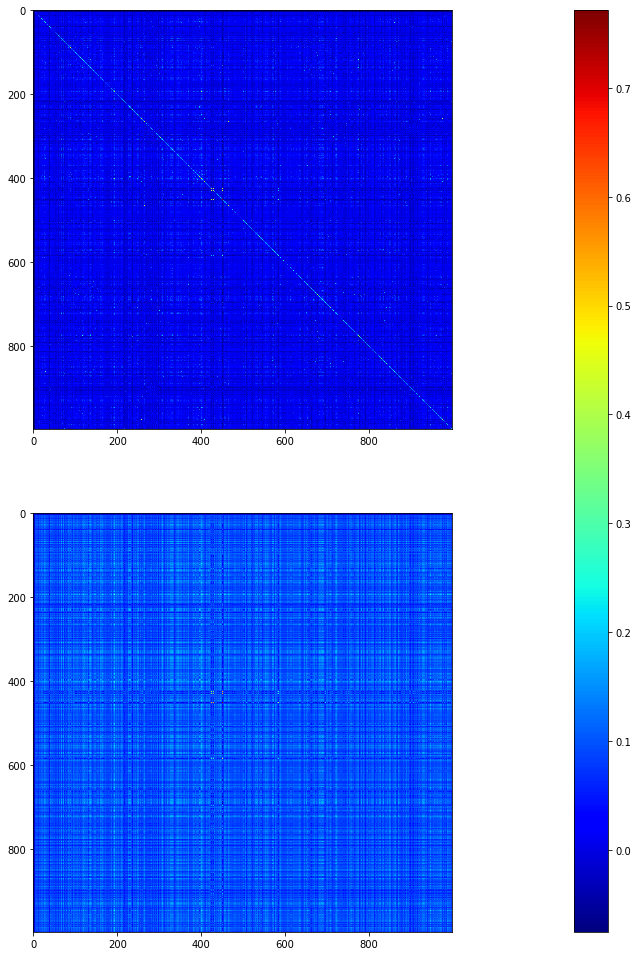

In [36]:
Uw2v, sw2v, Vw2v = np.linalg.svd(matrix_word2vec, full_matrices=False)
sw2v_sorted = sw2v.argsort()[::-1]

n_sw2v = 3
sw2v = np.diag(sw2v[:n_sw2v])
matrix_word2vec_ = np.dot(Uw2v[:,:n_sw2v], np.dot(sw2v, Vw2v[:n_sw2v,:]))

# Sorted by eigenvalues

# word2vec 
plt.subplot(211)
plt.imshow(matrix_word2vec[:, sw2v_sorted][sw2v_sorted,:])
# word2vec with 3 eigenvalues
plt.subplot(212)
plt.imshow(matrix_word2vec_[:, sw2v_sorted][sw2v_sorted,:])

plt.subplots_adjust(bottom=0.1, right=0.9, top=0.9)
cax = plt.axes([0.8, 0.1, 0.03, 0.8])
plt.colorbar(cax=cax)
plt.show()

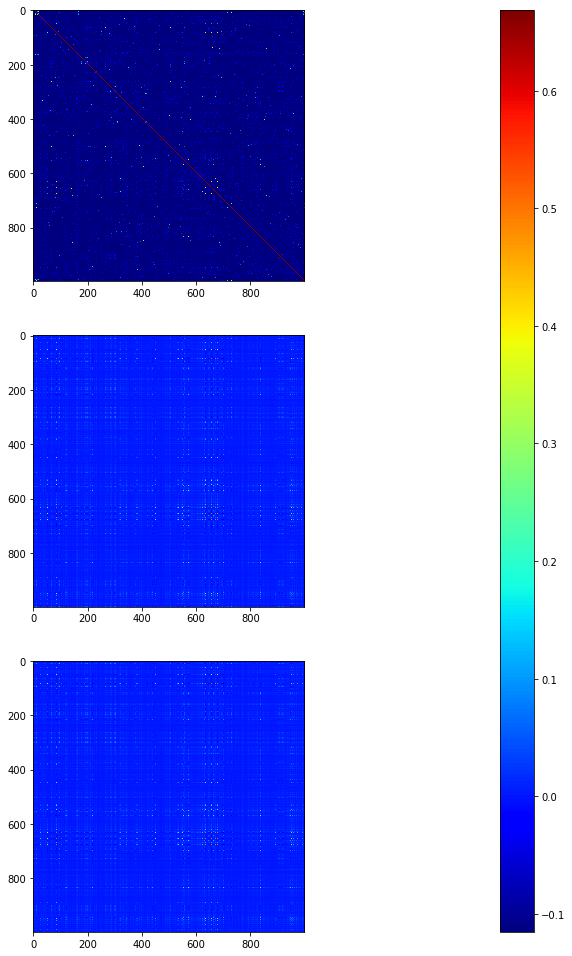

In [23]:
Ujs, sjs, Vjs = np.linalg.svd(matrix_jaccard, full_matrices=False)
sjs_sorted = sjs.argsort()[::-1]

n_sjs = 3
sjs = np.diag(sjs[:n_sjs])
matrix_jaccard_ = np.dot(Ujs[:,:n_sjs], np.dot(sjs, Vjs[:n_sjs,:]))

# Sorted by eigenvalues

# jaccard 
plt.subplot(311)
plt.imshow(matrix_jaccard[:, sjs_sorted][sjs_sorted,:])

# jaccard with 3 eigenvalues
plt.subplot(312)
plt.imshow(matrix_jaccard_[:, sjs_sorted][sjs_sorted,:])

# jaccard with 3 eigenvalues
plt.subplot(313)
plt.imshow(matrix_jaccard_[:, sw2v_sorted][sw2v_sorted,:])

plt.subplots_adjust(bottom=0.1, right=0.9, top=0.9)
cax = plt.axes([0.8, 0.1, 0.03, 0.8])
plt.colorbar(cax=cax)
plt.show()

In [37]:
print(sjs_sorted[:20], sjs_sorted[-20:])
print(sw2v_sorted[:20], sw2v_sorted[-20:])
      
new_arrange = []
for i,e in enumerate(sjs_sorted):
    new_arrange.append( 1 if sw2v_sorted[i] == e else 0)

print(new_arrange)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [987 986 985 984 983 988 981 980 979 978 977 989 990 991 992 993 994 995
 996 997]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [991 992 993 994 995 985 996 983 982 981 980 979 978 977 976 975 974 973
 972 997]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [15]:
# Uds, sds, Vds = np.linalg.svd(matrix_dice, full_matrices=False)
# sds_sorted = sds.argsort()[::-1]

# plt.matshow(matrix_dice[:, sds_sorted][sds_sorted,:])
# plt.colorbar()

# n_sds = 5
# sds = np.diag(sds[:n_sds])
# matrix_dice_ = np.dot(Uds[:,:n_sds], np.dot(sds, Vds[:n_sds,:]))
# plt.matshow(matrix_dice_[:, sds_sorted][sds_sorted,:])
# plt.colorbar()
# plt.matshow(matrix_dice_[:, sw2v_sorted][sw2v_sorted,:])
# plt.colorbar()